# Exercise 6: Support Vector Machines - Nonlinear model

In Andrew NG's course the training SVM algorithm is already provided and exercise is around identifying the optimal C and $\sigma$ values. In this case we will be using <code>sklean.svm</code> to train our SVM model and 

## Using the kernel trick to find separating hyperplanes in a high-dimensional space

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading all data on a dictonary
data = loadmat('ex6data2.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

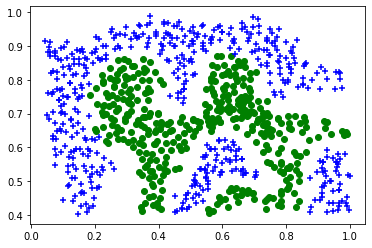

In [3]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

In [4]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X, y)

SVC(C=10.0, gamma=0.1, random_state=1)

In [5]:
svm.score(X,y)

0.6651216685979142

In [6]:
svm.intercept_, svm.classes_, svm.support_vectors_

(array([19.9557922]),
 array([0, 1], dtype=uint8),
 array([[0.37212 , 0.851608],
        [0.351382, 0.863304],
        [0.3053  , 0.854532],
        ...,
        [0.975806, 0.439474],
        [0.989631, 0.425439],
        [0.996544, 0.414912]]))

## Drawing the decision boundary

The <code>plotDecisionBoundary</code> function creates a mesh grid first - a net of coordinates that covers the entire plotting area - and then predicts the value for each point in the mesh. 

In [32]:
def plotDecisionBoundary (X, y, classifier, resolution=0.02, ax=None):
    
    # If there is no subplot passed it will use the plt instance
    if ax is None:
        ax = plt
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), 
                         np.arange(y_min, y_max, resolution))
    # the mesh array is the entire set of coordinates 
    # that creates the full grid
    mesh = np.c_[xx.ravel(), yy.ravel()]
    
    # We predict the output for every item in the grid
    Z = classifier.predict(mesh)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.8)

    # Plot also the training points
    ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
    ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

    # ax.xlim(xx.min(), xx.max())
    # ax.ylim(yy.min(), yy.max())

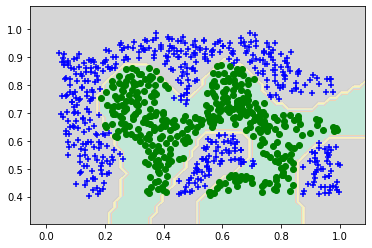

In [33]:
plotDecisionBoundary (X, y, svm, resolution=0.02)

## $\gamma$ parameter impact on the kernel trick

Here we are trying to identify the impact of changing the value of the <code>gamma</code> hyperparameter.

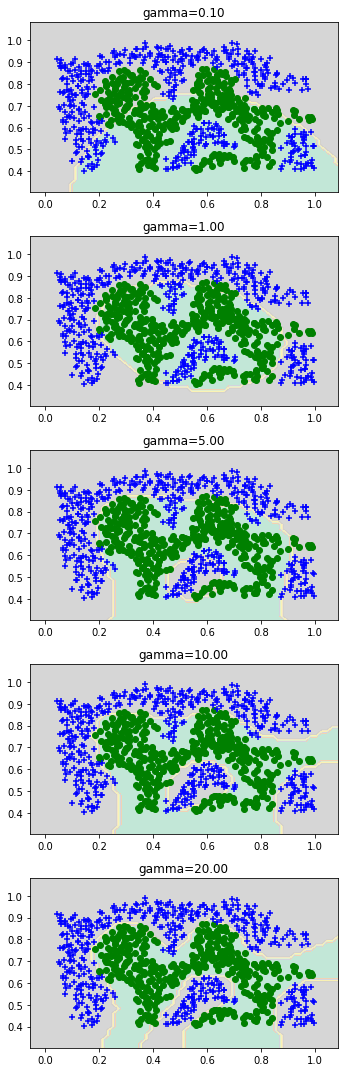

In [34]:
C = 10
gamma = [0.1, 1, 5, 10, 20]
fig, ax = plt.subplots(nrows = len(gamma), ncols = 1, sharex = False, sharey = False, figsize=(5,15))
for i in range(len(gamma)):
    # Plot the regression model
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma[i], C=C)
    svm.fit(X, y)
    fig.tight_layout()
    ax[i].set_title('gamma={:.2f}'.format(gamma[i]))
    plotDecisionBoundary (X, y, svm, ax=ax[i])
    

<div class="alert alert-block alert-info"> <b>Conclusion:</b> $\gamma$ determines how each training example influences the model. With a higher <code>gamma</code> value the decision boundary becomes tighter and bumpier. With a lower value the decision boundary is softer.

* high $\gamma$: low bias/high variance -> prone to overfit

* low $\gamma$: high bias/low variance -> prone to underfit 

</div>

## Tuning hyperparameters with GridSearchCV
Let's find the optimal combination of C and $\gamma$.
For the sake of learning we will also compare the <code>linear</code> with the <code>rbf</code> kernel, even though plotting the values it is obvious that <code>rbf</code> will be better for this model.

In [36]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'C' : param_range,
               'kernel': ['linear']},
              {'C' : param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator=SVC(random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 refit=True,
                 n_jobs=-1)

gs.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [39]:
gs.best_params_, gs.best_score_

({'C': 10, 'gamma': 100, 'kernel': 'rbf'}, 0.9290964982624967)

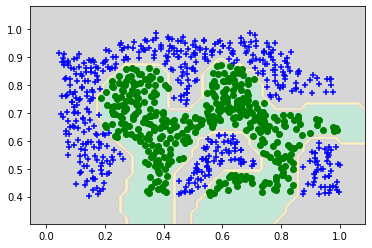

In [40]:
plotDecisionBoundary (X, y, gs.best_estimator_, resolution=0.02)

* <code>gs.best_params</code>: Parameters combination that provides the best score
* <code>gs.best_score_</code>: Model's score with the best parameters
* <code>gs.best_estimator_</code>: This is automatically fit with the best parameters if <code>refit=True</code>

## Running the exercise with the dataset 3

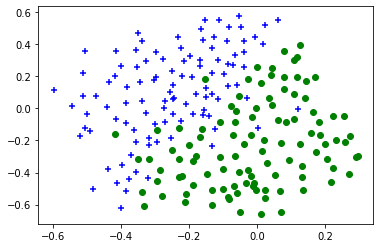

In [41]:
# Loading all data on a dictonary
data = loadmat('ex6data3.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', c='Green')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', c='Blue')

In [42]:
gs.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [43]:
gs.best_params_, gs.best_score_

({'C': 1, 'gamma': 10, 'kernel': 'rbf'}, 0.9190476190476191)

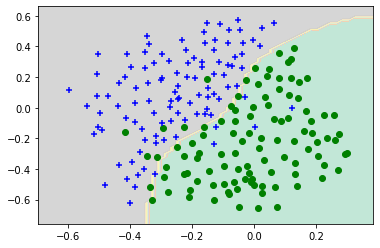

In [44]:
plotDecisionBoundary (X, y, gs.best_estimator_, resolution=0.02)